In [2]:
import pandas as pd
from matplotlib import pyplot as plt

url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/features/preprocess/preprocess.gzip.parquet'

df = pd.read_parquet(url)

In [3]:
df

,frame_index,blur,total_objects,median_motion,std_motion,red,orange,yellow,green,blue,purple,white,black,brown
0,0,430.135769,714,NaN,NaN,0.005310,0.038554,0.014686,0.005564,0.089557,0.000059,0.037699,0.041862,0.342829
1,10,395.302209,552,0.166990,9.659574,0.005103,0.036883,0.016817,0.007669,0.093883,0.000039,0.060255,0.066304,0.342894
2,20,462.118270,543,0.716732,10.009233,0.005047,0.043044,0.019084,0.006383,0.107987,0.000042,0.043858,0.082207,0.353612
3,30,555.682133,665,0.096535,12.898929,0.004307,0.046062,0.018513,0.008637,0.103922,0.000063,0.046531,0.070751,0.365431
4,40,388.726642,582,-0.000687,10.809773,0.005134,0.043364,0.018725,0.008359,0.078289,0.000154,0.061639,0.058620,0.398266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,4530,193.110082,480,-0.078625,9.583415,0.001219,0.024364,0.032153,0.007277,0.179325,0.000030,0.056395,0.001441,0.142243
454,4540,175.663169,509,-0.055947,8.889037,0.000696,0.025750,0.034329,0.008590,0.158988,0.000017,0.060831,0.000490,0.199795
455,4550,300.199870,447,0.313875,9.893580,0.001200,0.022023,0.015564,0.010927,0.140361,0.000013,0.055774,0.000662,0.203927
456,4560,594.791352,511,-0.780784,10.097118,0.001742,0.024324,0.010293,0.007553,0.132486,0.000002,0.091061,0.001769,0.219801


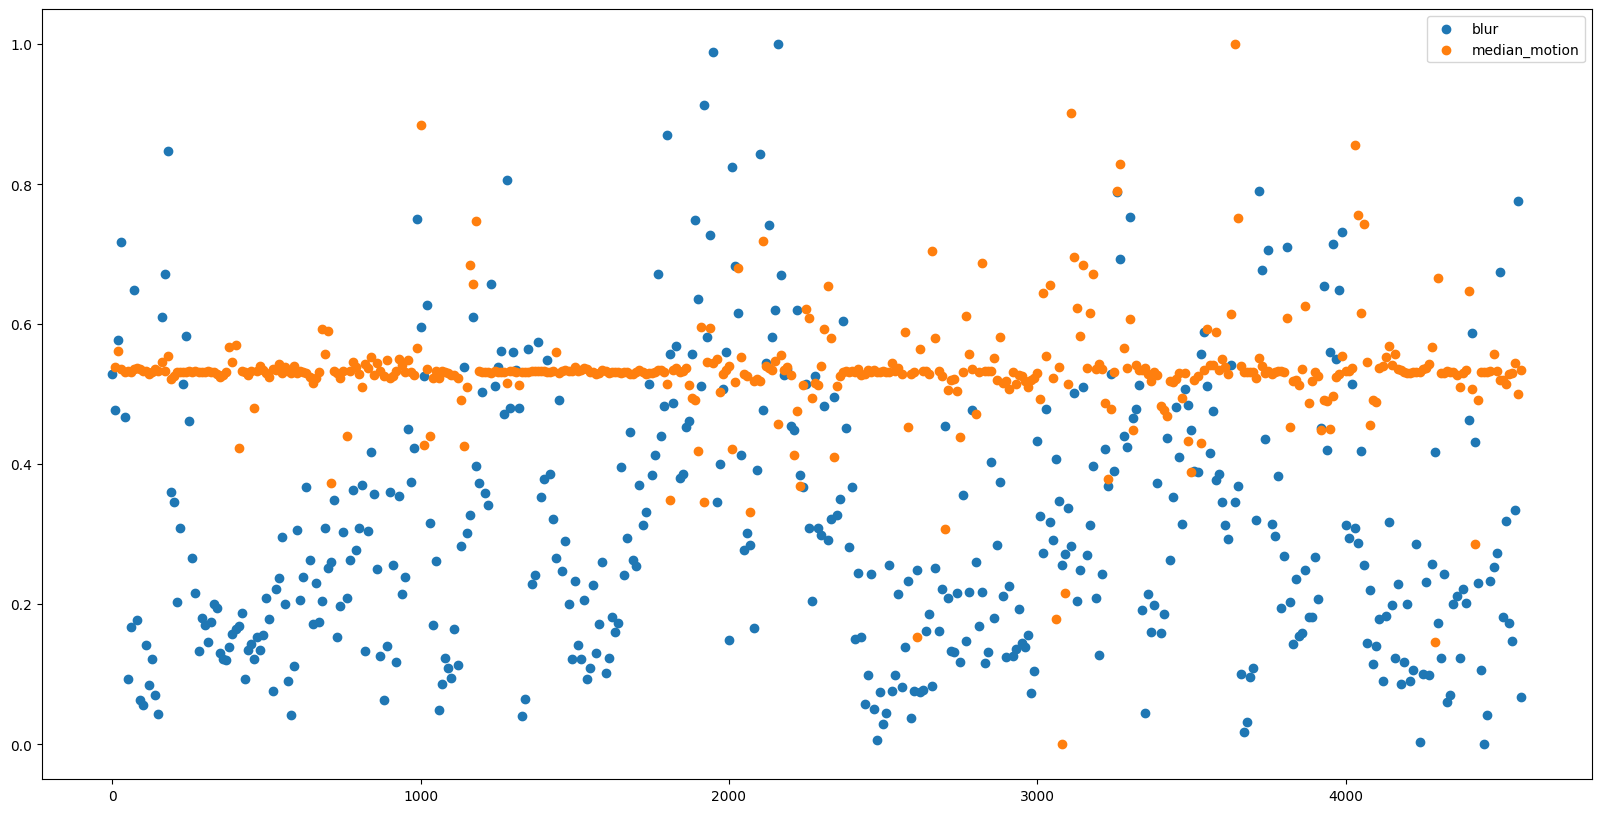

In [4]:
from sklearn.preprocessing import MinMaxScaler

# scale blur, total_objects, median_motion, red, yellow, green, blue, orange, and purple

scaler = MinMaxScaler()

dff = df[['blur', 'total_objects', 'median_motion', 'red', 'yellow', 'green', 'blue', 'orange', 'purple']]

scaler.fit(dff)

dff = scaler.transform(dff)

# add frame index back to dff
dff = pd.DataFrame(dff, columns=['blur', 'total_objects', 'median_motion', 'red', 'yellow', 'green', 'blue', 'orange', 'purple'])

dff['frame_index'] = df['frame_index']

plt.figure(figsize=(20,10))

plt.scatter(dff['frame_index'], dff['blur'], label='blur')
#plt.scatter(dff['frame_index'], dff['total_objects'], label='total_objects')
plt.scatter(dff['frame_index'], dff['median_motion'], label='median_motion')
# plt.scatter(dff['frame_index'], dff['red'], label='red')
# plt.scatter(dff['frame_index'], dff['yellow'], label='yellow')
# plt.scatter(dff['frame_index'], dff['blue'], label='blue')
# plt.scatter(dff['frame_index'], dff['orange'], label='orange')
# plt.scatter(dff['frame_index'], dff['green'], label='green')
# plt.scatter(dff['frame_index'], dff['purple'], label='purple')

plt.legend()
plt.show()


In [6]:
odf = pd.read_parquet('http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/features/objects/objects.gzip.parquet')

odf

,frame_index,x,y,width,height
0,0,0.0,0.0,768.0,432.0
1,0,2660.0,0.0,236.0,432.0
2,0,1670.0,0.0,418.0,245.0
3,0,870.0,135.0,540.0,297.0
4,0,0.0,0.0,226.0,432.0
...,...,...,...,...,...
4427,4570,1565.0,66.0,287.0,366.0
4428,4570,0.0,0.0,768.0,432.0
4429,4570,0.0,0.0,422.0,432.0
4430,4570,0.0,0.0,600.0,432.0
